# Get more from Crime Rate data and other socio-economic indicators with Pyinterpolate

---

## URL:

- [Article](https://ml-gis-service.com/index.php/2022/12/09/get-more-from-crime-rate-data-and-other-socio-economic-indicators-with-pyinterpolate/)

---

## Part 4: Data deconvolution (fit & transform)


### Block 1 - imports

In [1]:
import geopandas as gpd
import pyinterpolate as ptp

### Block 2 - prepare blocks & point support data

In [2]:
BLOCK_FILE_PATH = 'data/crimerates.shp'
BLOCK_VALUE_COL = 'CrimeRate'
BLOCK_GEOMETRY = 'geometry'
BLOCK_INDEX_COL = 'Code'

POINT_SUPPORT_PATH = 'data/population.shp'
POINT_SUPPORT_VAL_COL = 'TOT'
POINT_SUPPORT_GEOMETRY = 'geometry'

In [3]:
# Blocks
blocks_input = ptp.Blocks()
blocks_input.from_file(fpath=BLOCK_FILE_PATH,
                       value_col=BLOCK_VALUE_COL,
                       geometry_col=BLOCK_GEOMETRY,
                       index_col=BLOCK_INDEX_COL)

In [4]:
# Point support
point_support_input = ptp.PointSupport()
point_support_input.from_files(point_support_data_file=POINT_SUPPORT_PATH,
                               blocks_file=BLOCK_FILE_PATH,
                               point_support_geometry_col=POINT_SUPPORT_GEOMETRY,
                               point_support_val_col=POINT_SUPPORT_VAL_COL,
                               blocks_geometry_col=BLOCK_GEOMETRY,
                               blocks_index_col=BLOCK_INDEX_COL)

### Block 3 - fit models

In [5]:
MODELS = []
STEP_SIZE = 38_000
MAX_RANGE = 380_000
NUGGETS = [
    0,
    4 * 10**5
]

# Fit model without nugget

transformer = ptp.Deconvolution()

In [6]:
transformer.fit(agg_dataset=blocks_input,
                point_support_dataset=point_support_input,
                agg_step_size=STEP_SIZE,
                agg_max_range=MAX_RANGE,
                agg_nugget=NUGGETS[0])

Regularization fit process starts
Regularization fit process ends


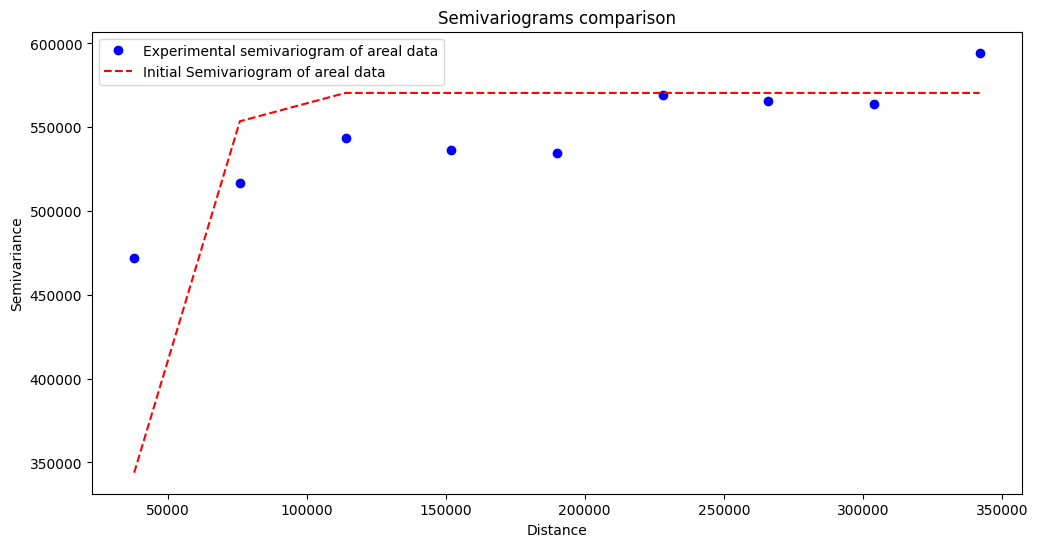

In [7]:
transformer.plot_variograms()

### Block 4 - transform models & check deviations, plot output variograms

In [8]:
transformer.transform(max_iters=5)

Transform procedure starts


100%|█████████████████████████████████████████████| 5/5 [00:57<00:00, 11.46s/it]


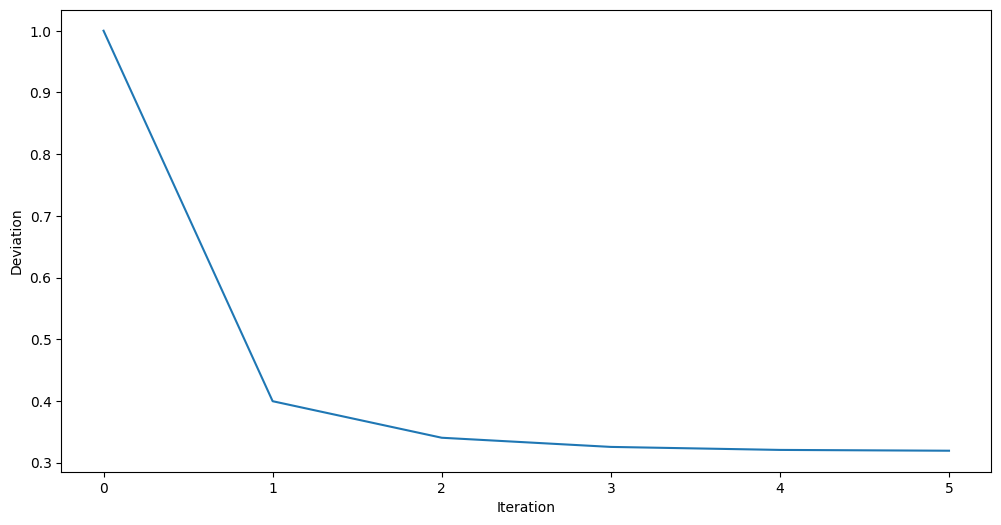

In [9]:
transformer.plot_deviations()

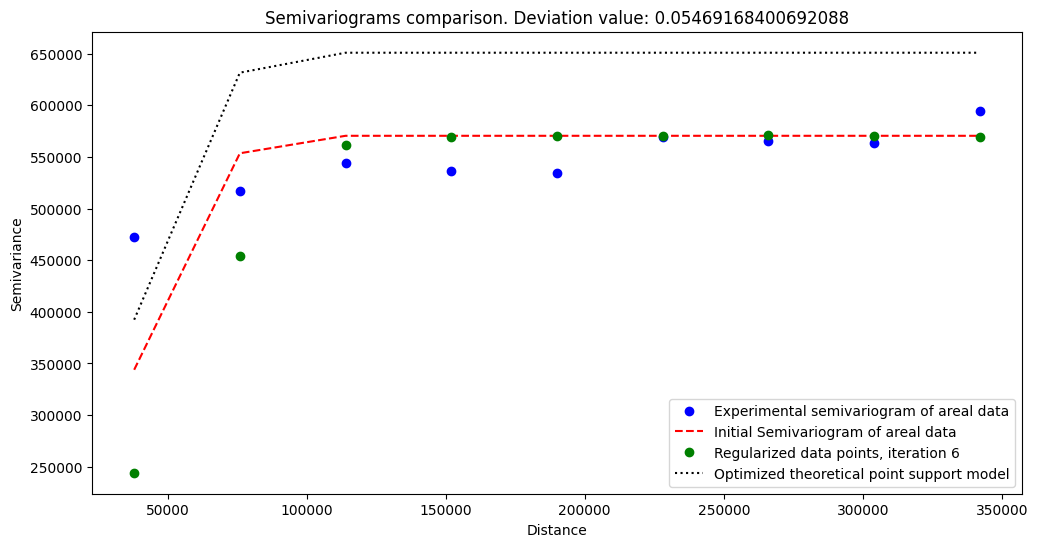

In [10]:
transformer.plot_variograms()

### Block 5 - export fitted and transformed model

In [11]:
transformer.export_model('data/no_nugget_model.json')

---